https://github.com/vc1492a/PyNomaly

Anomaly detection using LoOP: Local Outlier Probabilities, a local density based outlier detection method providing an outlier score in the range of [0,1].

The outlier score of each sample is called the Local Outlier Probability. It measures the local deviation of density of a given sample with respect to its neighbors as Local Outlier Factor (LOF), but provides normalized outlier scores in the range [0,1]. These outlier scores are directly interpretable as a probability of an object being an outlier. Since Local Outlier Probabilities provides scores in the range [0,1], practitioners are free to interpret the results according to the application.

Like LOF, it is local in that the anomaly score depends on how isolated the sample is with respect to the surrounding neighborhood. Locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that lie in regions of lower density compared to their neighbors and thus identify samples that may be outliers according to their Local Outlier Probability.

Only requirement is `numpy>=1.12.0`

In [1]:
from PyNomaly import loop
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.random.rand(100, 5)
scores = loop.LocalOutlierProbability(data).fit().local_outlier_probabilities

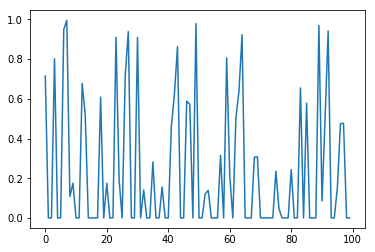

In [3]:
plt.plot(scores)

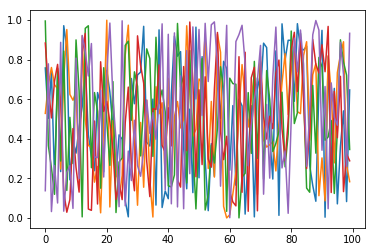

In [4]:
plt.plot(data)

# Iris example

In [5]:
from PyNomaly import loop
import pandas as pd
from pydataset import data
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# import the data and remove any non-numeric columns
iris = pd.DataFrame(data('iris'))
iris = pd.DataFrame(iris.drop('Species', 1))

In [7]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


Next, let's cluster the data using DBSCAN and generate two sets of scores. On both cases, we will use the default values for both extent (0.997) and n_neighbors (10).

In [8]:
db = DBSCAN(eps=0.9, min_samples=10).fit(iris)
m = loop.LocalOutlierProbability(iris).fit()
scores_noclust = m.local_outlier_probabilities
m_clust = loop.LocalOutlierProbability(iris, cluster_labels=db.labels_).fit()
scores_clust = m_clust.local_outlier_probabilities

Organize the data into two separate Pandas DataFrames.

In [9]:
iris_clust = pd.DataFrame(iris.copy())
iris_clust['scores'] = scores_clust
iris_clust['labels'] = db.labels_

In [10]:
iris_clust.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,scores,labels
1,5.1,3.5,1.4,0.2,0,0
2,4.9,3.0,1.4,0.2,0,0
3,4.7,3.2,1.3,0.2,0,0
4,4.6,3.1,1.5,0.2,0,0
5,5.0,3.6,1.4,0.2,0,0


In [11]:
iris_clust['scores'].describe()

count     150.0
unique     55.0
top         0.0
freq       95.0
Name: scores, dtype: float64

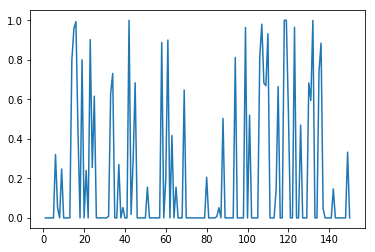

In [12]:
plt.plot(iris_clust['scores'])

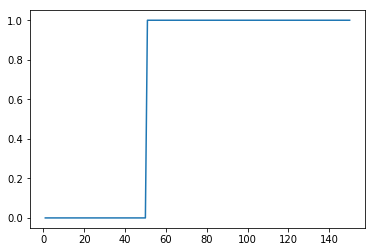

In [13]:
plt.plot(iris_clust['labels'])

And finally, let's visualize the scores provided by LoOP in both cases (with and without clustering). Note the differences between using LocalOutlierProbability with and without clustering. In the example without clustering, samples are scored according to the distribution of the entire data set. In the example with clustering, each sample is scored according to the distribution of each cluster. Which approach is suitable depends on the use case.

APPEARS TO BE AN ERROR AS `scores_noclust` IS NOT USED

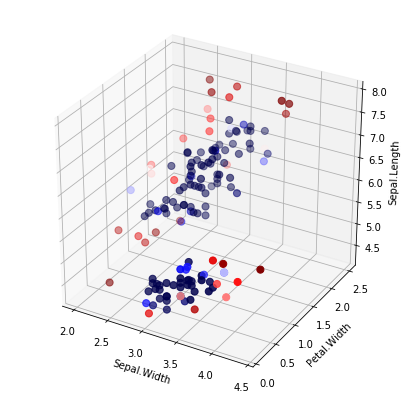

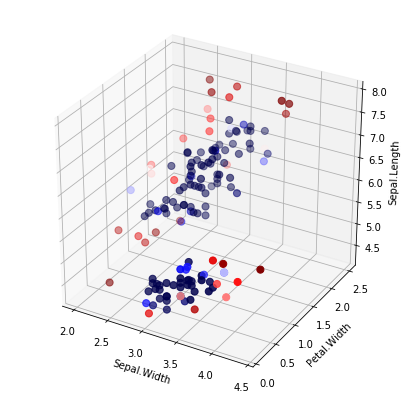

Text(0.5,0,'Sepal.Length')

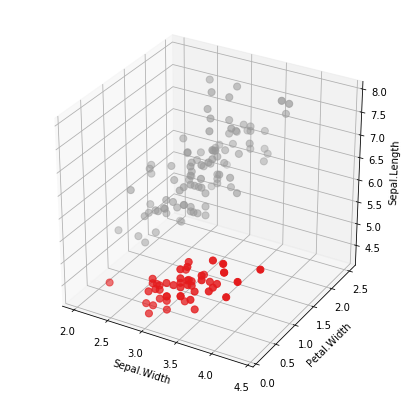

In [14]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris['Sepal.Width'], iris['Petal.Width'], iris['Sepal.Length'],
c=iris_clust['scores'], cmap='seismic', s=50)
ax.set_xlabel('Sepal.Width')
ax.set_ylabel('Petal.Width')
ax.set_zlabel('Sepal.Length')
plt.show()
plt.clf()
plt.cla()
plt.close()

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_clust['Sepal.Width'], iris_clust['Petal.Width'], iris_clust['Sepal.Length'],
c=iris_clust['scores'], cmap='seismic', s=50)
ax.set_xlabel('Sepal.Width')
ax.set_ylabel('Petal.Width')
ax.set_zlabel('Sepal.Length')
plt.show()
plt.clf()
plt.cla()
plt.close()

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_clust['Sepal.Width'], iris_clust['Petal.Width'], iris_clust['Sepal.Length'],
c=iris_clust['labels'], cmap='Set1', s=50)
ax.set_xlabel('Sepal.Width')
ax.set_ylabel('Petal.Width')
ax.set_zlabel('Sepal.Length')
#plt.show()
#plt.clf()
#plt.cla()
#plt.close()